Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None

First few rows:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23936\1400317790.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Missing values in each column:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Number of duplicate rows: 0


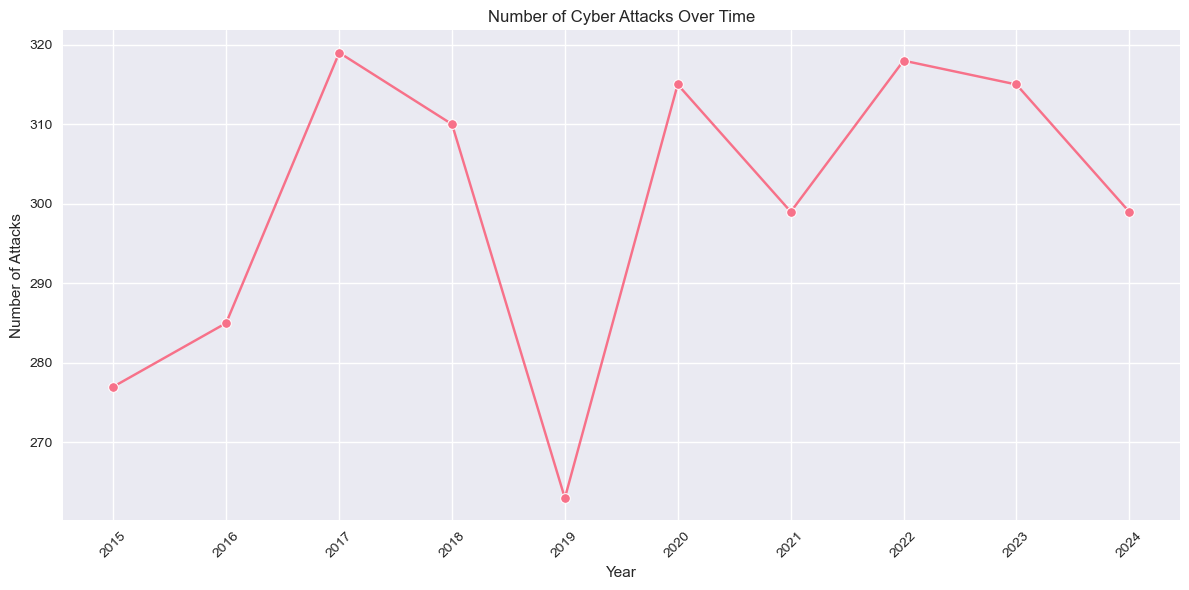

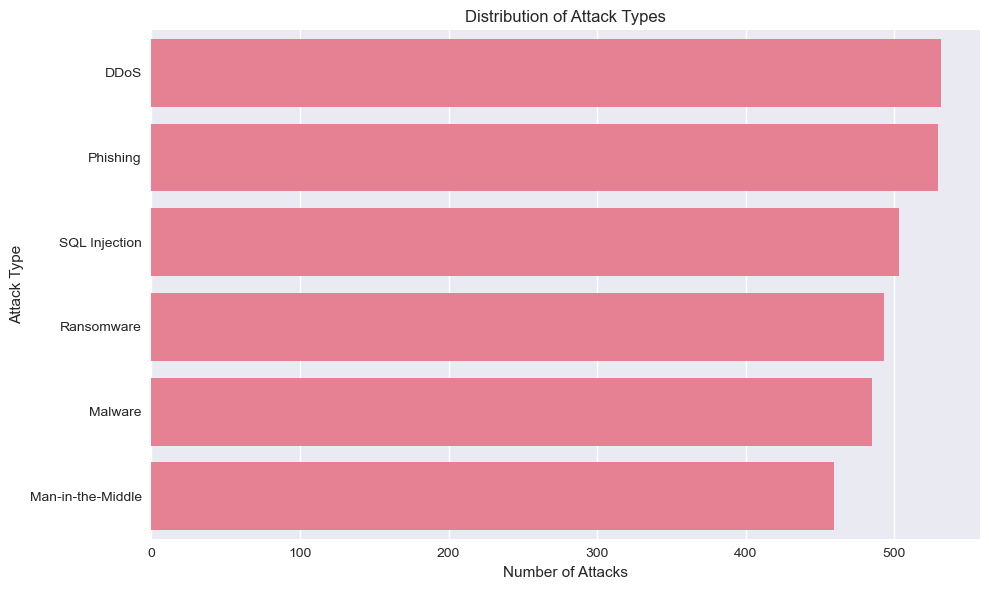

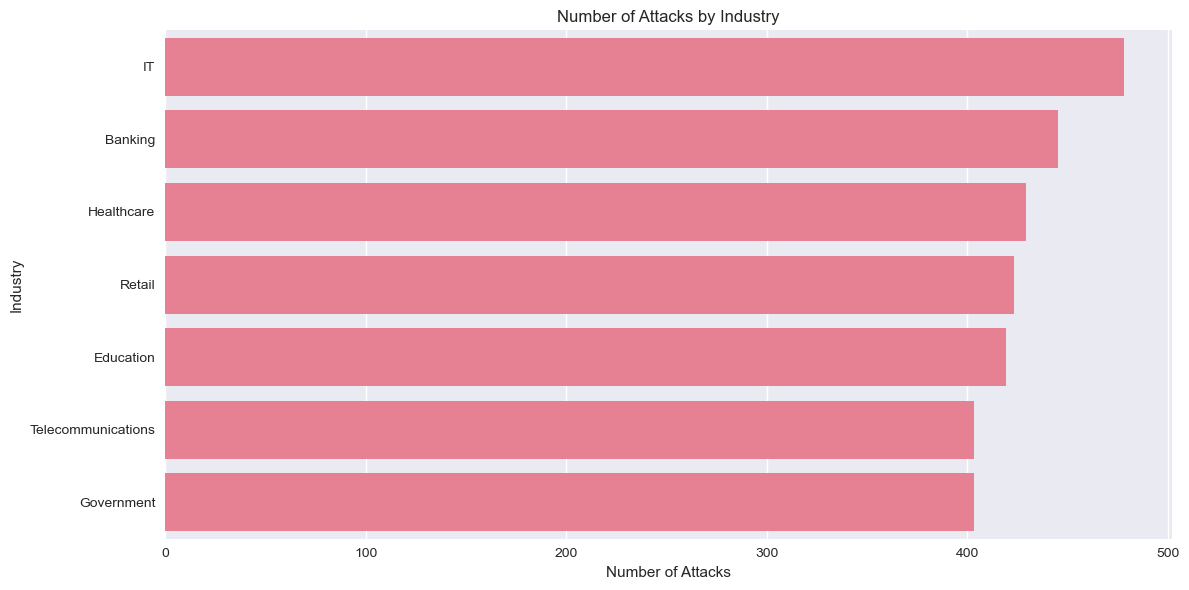

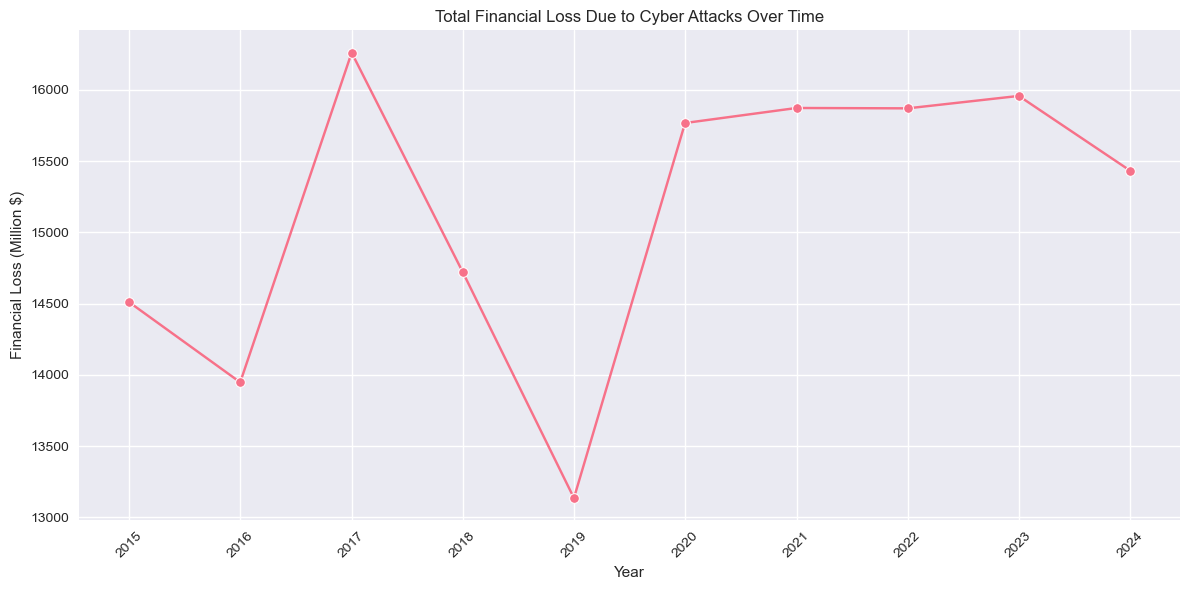

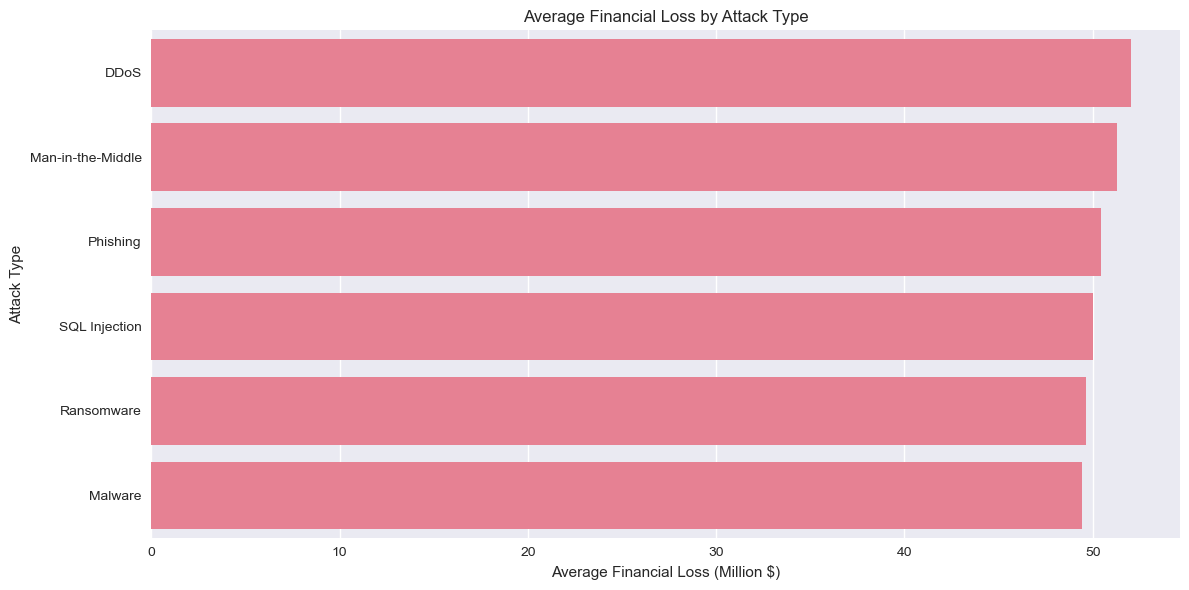

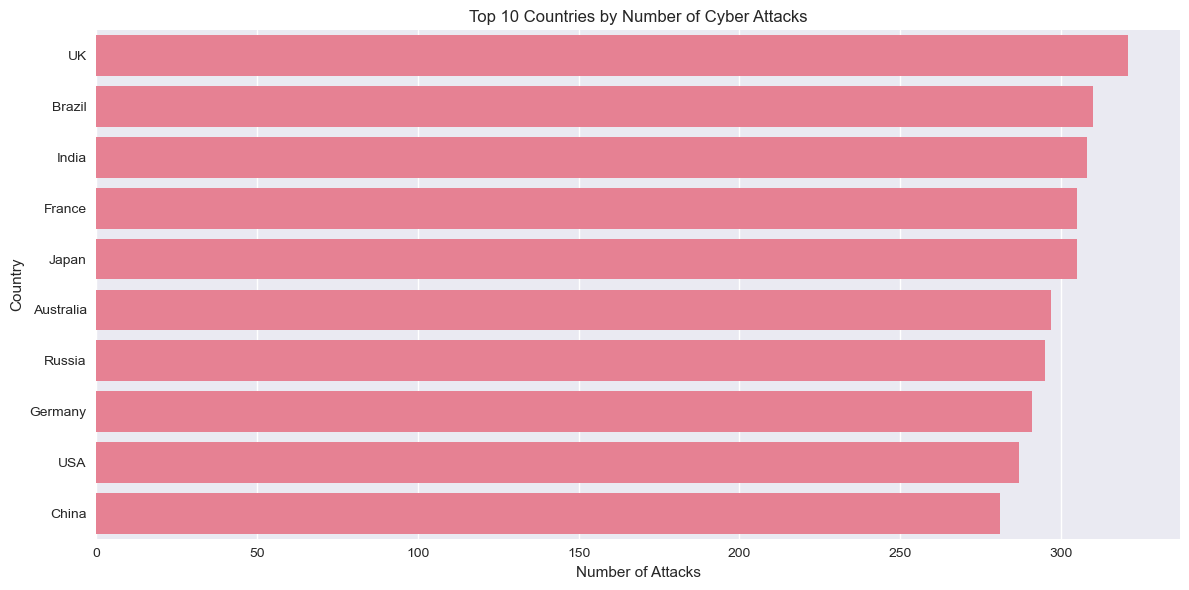

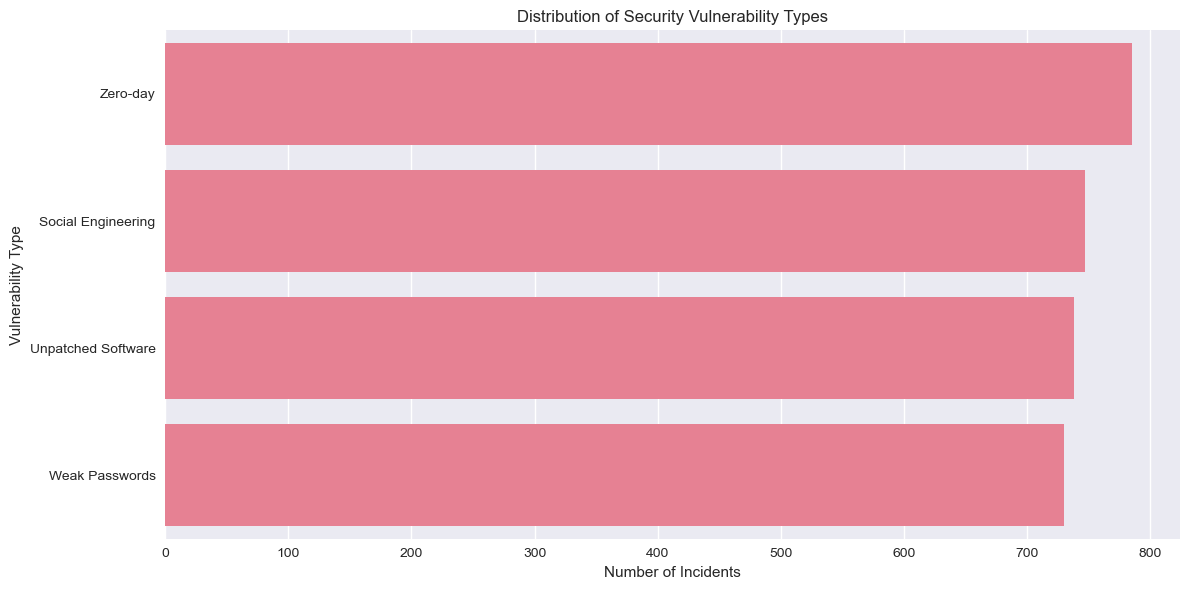

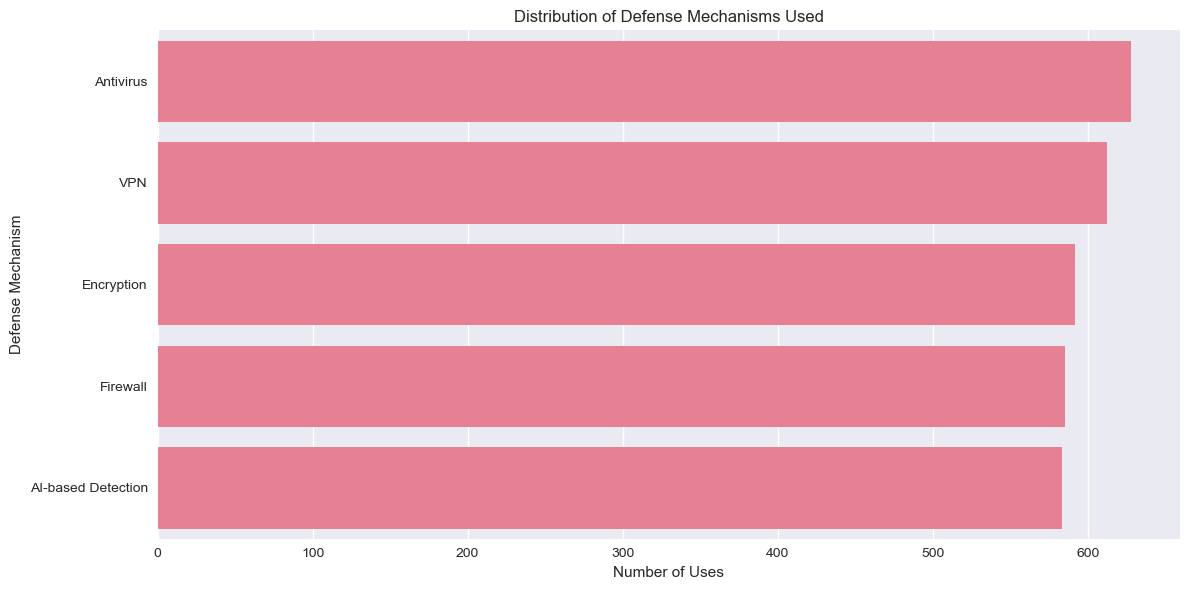

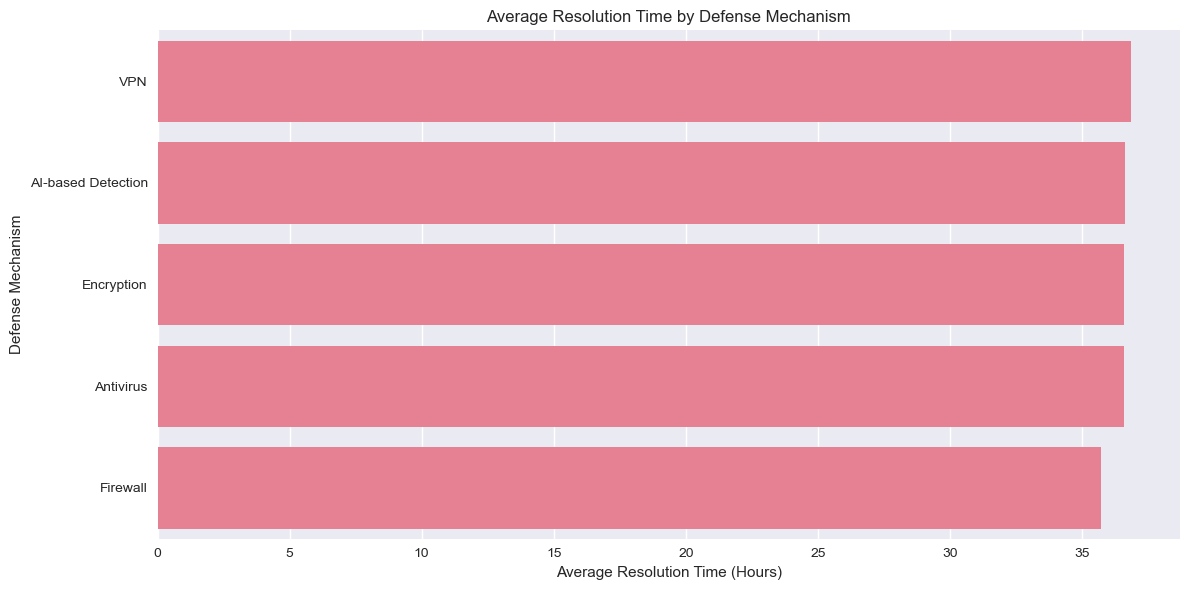

Key Statistics:
Total number of cyber attacks: 3000
Total financial loss: $151478.91 million
Average financial loss per attack: $50.49 million
Average resolution time: 36.48 hours
Total affected users: 1,514,052,409

Most common attack type: DDoS
Most vulnerable industry: IT
Most effective defense mechanism: Firewall


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Read the dataset
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()

# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Clean up column names
df.columns = df.columns.str.strip()

# Attacks over time
plt.figure(figsize=(12, 6))
yearly_attacks = df.groupby('Year').size()
sns.lineplot(data=yearly_attacks, marker='o')
plt.title('Number of Cyber Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Attack types distribution
plt.figure(figsize=(10, 6))
attack_types = df['Attack Type'].value_counts()
sns.barplot(x=attack_types.values, y=attack_types.index)
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

# Industry analysis
plt.figure(figsize=(12, 6))
industry_attacks = df['Target Industry'].value_counts()
sns.barplot(x=industry_attacks.values, y=industry_attacks.index)
plt.title('Number of Attacks by Industry')
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

# Financial loss analysis
plt.figure(figsize=(12, 6))
yearly_loss = df.groupby('Year')['Financial Loss (in Million $)'].sum()
sns.lineplot(data=yearly_loss, marker='o')
plt.title('Total Financial Loss Due to Cyber Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Financial Loss (Million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average loss by attack type
plt.figure(figsize=(12, 6))
avg_loss_by_type = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_loss_by_type.values, y=avg_loss_by_type.index)
plt.title('Average Financial Loss by Attack Type')
plt.xlabel('Average Financial Loss (Million $)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

# Top 10 countries by number of attacks
plt.figure(figsize=(12, 6))
country_attacks = df['Country'].value_counts().head(10)
sns.barplot(x=country_attacks.values, y=country_attacks.index)
plt.title('Top 10 Countries by Number of Cyber Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Vulnerability types distribution
plt.figure(figsize=(12, 6))
vuln_types = df['Security Vulnerability Type'].value_counts()
sns.barplot(x=vuln_types.values, y=vuln_types.index)
plt.title('Distribution of Security Vulnerability Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Vulnerability Type')
plt.tight_layout()
plt.show()

# Defense mechanisms distribution
plt.figure(figsize=(12, 6))
defense_mech = df['Defense Mechanism Used'].value_counts()
sns.barplot(x=defense_mech.values, y=defense_mech.index)
plt.title('Distribution of Defense Mechanisms Used')
plt.xlabel('Number of Uses')
plt.ylabel('Defense Mechanism')
plt.tight_layout()
plt.show()

# Average resolution time by defense mechanism
plt.figure(figsize=(12, 6))
avg_resolution = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_resolution.values, y=avg_resolution.index)
plt.title('Average Resolution Time by Defense Mechanism')
plt.xlabel('Average Resolution Time (Hours)')
plt.ylabel('Defense Mechanism')
plt.tight_layout()
plt.show()

# Key Statistics
print("Key Statistics:")
print(f"Total number of cyber attacks: {len(df)}")
print(f"Total financial loss: ${df['Financial Loss (in Million $)'].sum():.2f} million")
print(f"Average financial loss per attack: ${df['Financial Loss (in Million $)'].mean():.2f} million")
print(f"Average resolution time: {df['Incident Resolution Time (in Hours)'].mean():.2f} hours")
print(f"Total affected users: {df['Number of Affected Users'].sum():,}")

# Most common attack type
print(f"\nMost common attack type: {df['Attack Type'].mode()[0]}")

# Most vulnerable industry
print(f"Most vulnerable industry: {df['Target Industry'].mode()[0]}")

# Most effective defense mechanism (based on resolution time)
best_defense = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().idxmin()
print(f"Most effective defense mechanism: {best_defense}")
